In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
output_folder = "output"

In [61]:
def moving_avg(a, size=1):
    for i in range(size):
        a = np.insert(a, 0, a[0])
        a = np.insert(a, -1, a[-1])
    return np.array([np.mean(a[i-size:i+size+1]) for i in range(size, len(a)-size)])

## FedAvg, different #clients

In [103]:
np.where(np.array(list_n_clients) == 2)[0][0]

1

Text(0.5, 1.0, 'Client 1')

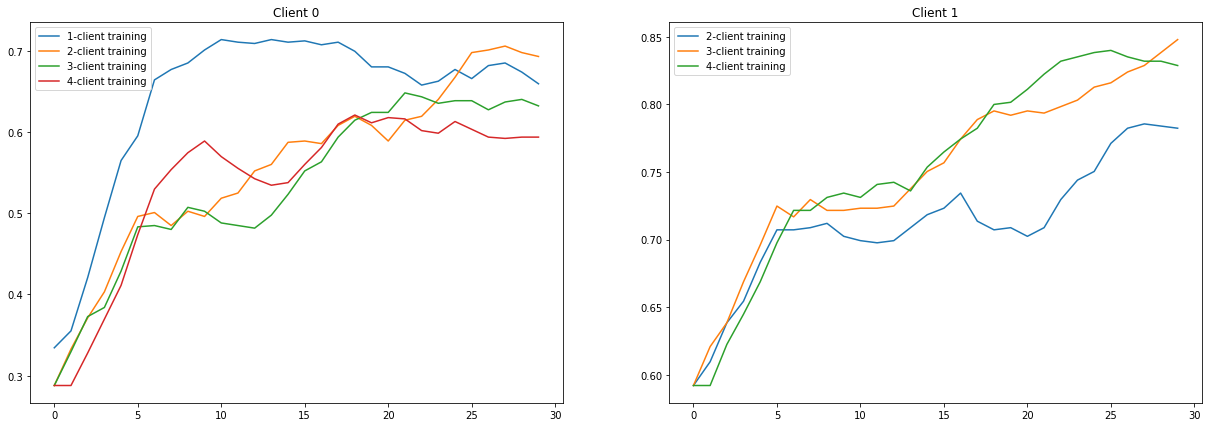

In [105]:
list_n_clients = [1, 2, 3, 4]
window_size = 2
accuracy_client = [np.load(os.path.join(output_folder, f"{i}-clients", "1-epochs", "fedavg", "model", "test_accuracy.npy")) for i in list_n_clients]

plt.rcParams["figure.figsize"] = (21, 7)

id_client = 0
plt.subplot(1, 2, 1)
for i, n_clients in enumerate(list_n_clients):
    plt.plot(moving_avg(accuracy_client[i][id_client], window_size), label=f"{n_clients}-client training")
plt.legend()
plt.title(f"Client {id_client}")

id_client = 1
plt.subplot(1, 2, 2)
for i, n_clients in enumerate(list_n_clients):
    if id_client < n_clients:
        plt.plot(moving_avg(accuracy_client[i][id_client], window_size), label=f"{n_clients}-client training")
plt.legend()
plt.title(f"Client {id_client}")

## Comparison #epochs

Text(0.5, 1.0, 'Average client')

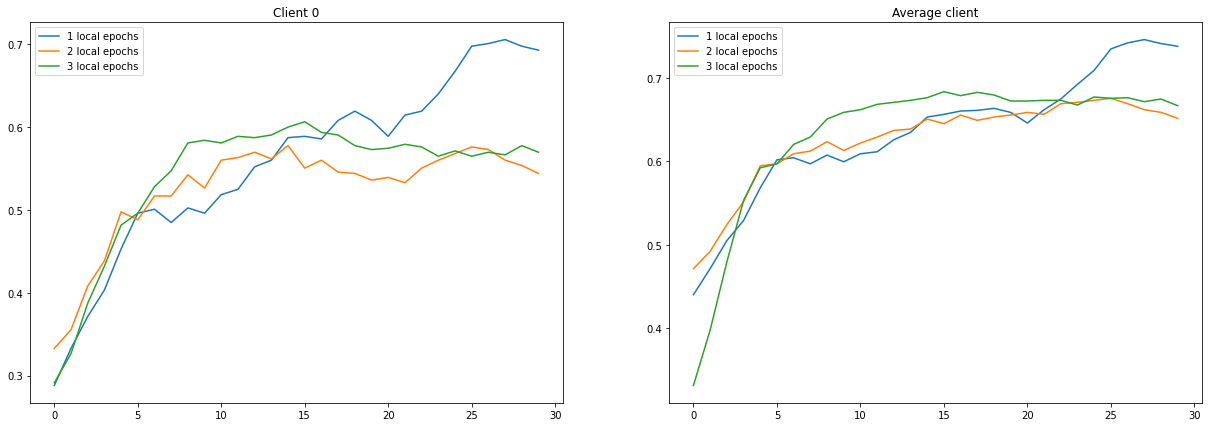

In [106]:
list_n_epochs = [1, 2, 3]
window_size = 2

accuracy_client = [np.load(os.path.join(output_folder, f"2-clients", f"{e}-epochs", "fedavg", "model", "test_accuracy.npy")) for e in list_n_epochs]

plt.rcParams["figure.figsize"] = (21, 7)

plt.subplot(1, 2, 1)
id_client = 0
for i, n_epochs in enumerate(list_n_epochs):
#     plt.plot
    plt.plot(moving_avg(accuracy_client[i][id_client], window_size), label=f"{n_epochs} local epochs")

# for i, n_clients in enumerate(list_n_clients):
#     plt.plot(accuracy_client_scaffold_2[i][id_client], label=f"{n_clients}-client training scaffold 2 epochs")

plt.legend()
plt.title(f"Client {id_client}")

plt.subplot(1, 2, 2)
for i, n_epochs in enumerate(list_n_epochs):
    plt.plot(moving_avg(accuracy_client[i], window_size), label=f"{n_epochs} local epochs")
    
plt.legend()
plt.title(f"Average client")

## Comparison Scaffold-FedAvg

Text(0.5, 1.0, 'Average client')

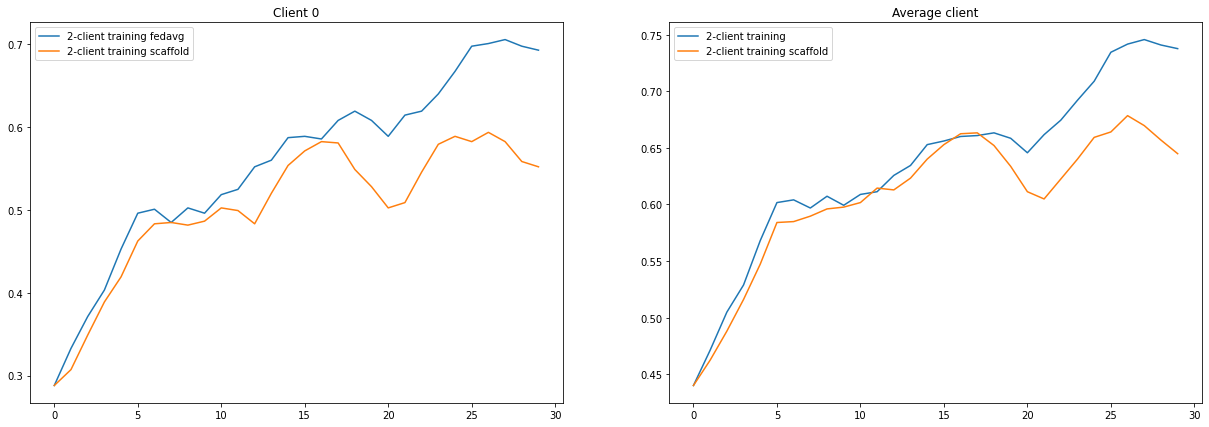

In [83]:
list_n_clients = [2]
window_size = 2

accuracy_client = [np.load(os.path.join(output_folder, f"{i}-clients", f"1-epochs", "fedavg", "model", "test_accuracy.npy")) for i in list_n_clients]
accuracy_client_scaffold = [np.load(os.path.join(output_folder, f"{i}-clients", f"1-epochs", "scaffold", "model", "test_accuracy.npy")) for i in list_n_clients]
accuracy_client_scaffold_2 = [np.load(os.path.join(output_folder, f"{i}-clients", f"2-epochs", "scaffold", "model", "test_accuracy.npy")) for i in list_n_clients]

plt.rcParams["figure.figsize"] = (21, 7)

plt.subplot(1, 2, 1)
id_client = 0
for i, n_clients in enumerate(list_n_clients):
    plt.plot(moving_avg(accuracy_client[i][id_client], window_size), label=f"{n_clients}-client training fedavg")
    
for i, n_clients in enumerate(list_n_clients):
    plt.plot(moving_avg(accuracy_client_scaffold[i][id_client], window_size), label=f"{n_clients}-client training scaffold")
    
# for i, n_clients in enumerate(list_n_clients):
#     plt.plot(accuracy_client_scaffold_2[i][id_client], label=f"{n_clients}-client training scaffold 2 epochs")

plt.legend()
plt.title(f"Client {id_client}")

plt.subplot(1, 2, 2)
for i, n_clients in enumerate(list_n_clients):
    plt.plot(moving_avg(np.mean(accuracy_client[i], axis=0), window_size), label=f"{n_clients}-client training")
    
for i, n_clients in enumerate(list_n_clients):
    plt.plot(moving_avg(np.mean(accuracy_client_scaffold[i], axis=0), window_size), label=f"{n_clients}-client training scaffold")

plt.legend()
plt.title(f"Average client")